In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Fungsi keanggotaan Permintaan
perm_turun = lambda x: 1 if x <= 1000 else (3000 - x)/2000 if x <= 3000 else 0
perm_naik  = lambda x: 0 if x <= 1000 else (x - 1000)/2000 if x <= 3000 else 1

# Fungsi keanggotaan Persediaan
pers_sedikit = lambda x: 1 if x <= 200 else (400 - x)/200 if x <= 400 else 0
pers_sedang  = lambda x: 0 if x <= 200 else (x - 200)/200 if x <= 400 else (800 - x)/400 if x <= 800 else 0
pers_banyak  = lambda x: 0 if x <= 500 else (x - 500)/300 if x <= 800 else 1

# Fungsi keanggotaan Produksi
prod_berkurang = lambda x: 1 if x <= 2000 else (7000 - x)/5000 if x <= 7000 else 0
prod_bertambah = lambda x: 0 if x <= 2000 else (x - 2000)/5000 if x <= 7000 else 1


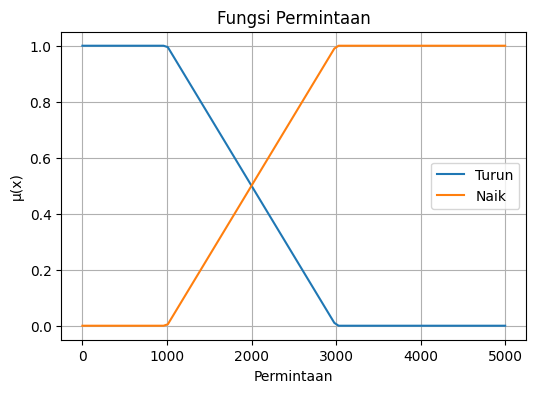

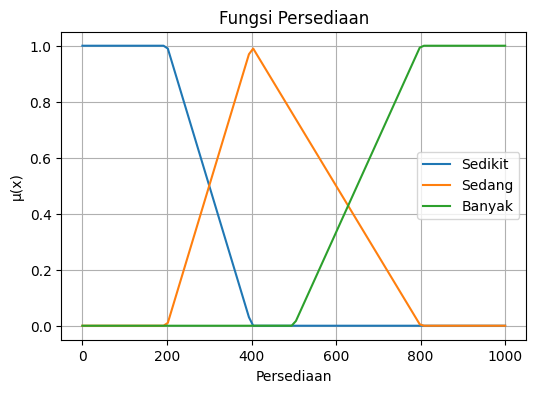

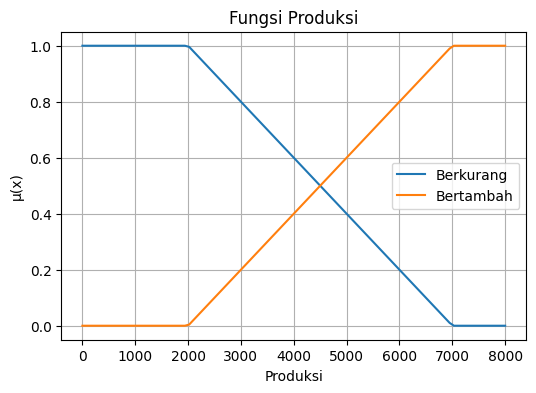

In [3]:
x_perm = np.linspace(0, 5000, 100)
x_pers = np.linspace(0, 1000, 100)
x_prod = np.linspace(0, 8000, 100)

# Plot permintaan
plt.figure(figsize=(6,4))
plt.plot(x_perm, [perm_turun(x) for x in x_perm], label='Turun')
plt.plot(x_perm, [perm_naik(x) for x in x_perm], label='Naik')
plt.title('Fungsi Permintaan')
plt.xlabel('Permintaan')
plt.ylabel('μ(x)')
plt.legend()
plt.grid(True)
plt.show()

# Plot persediaan
plt.figure(figsize=(6,4))
plt.plot(x_pers, [pers_sedikit(x) for x in x_pers], label='Sedikit')
plt.plot(x_pers, [pers_sedang(x) for x in x_pers], label='Sedang')
plt.plot(x_pers, [pers_banyak(x) for x in x_pers], label='Banyak')
plt.title('Fungsi Persediaan')
plt.xlabel('Persediaan')
plt.ylabel('μ(x)')
plt.legend()
plt.grid(True)
plt.show()

# Plot produksi
plt.figure(figsize=(6,4))
plt.plot(x_prod, [prod_berkurang(x) for x in x_prod], label='Berkurang')
plt.plot(x_prod, [prod_bertambah(x) for x in x_prod], label='Bertambah')
plt.title('Fungsi Produksi')
plt.xlabel('Produksi')
plt.ylabel('μ(x)')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
a = 3000  # permintaan
b = 700   # persediaan


In [5]:
mu_perm_turun = perm_turun(a)
mu_perm_naik = perm_naik(a)
mu_pers_sedang = pers_sedang(b)

print("Hasil Fuzzifikasi:")
print(f"μ_turun = {mu_perm_turun}")
print(f"μ_naik = {mu_perm_naik}")
print(f"μ_sedang = {mu_pers_sedang}")


Hasil Fuzzifikasi:
μ_turun = 0.0
μ_naik = 1.0
μ_sedang = 0.25


In [6]:
r1_strength = min(mu_perm_turun, mu_pers_sedang)  # berkurang
r2_strength = min(mu_perm_naik, mu_pers_sedang)   # bertambah

print("Derajat Kekuatan Aturan:")
print(f"Rule 1 (Berkurang) = {r1_strength}")
print(f"Rule 2 (Bertambah) = {r2_strength}")


Derajat Kekuatan Aturan:
Rule 1 (Berkurang) = 0.0
Rule 2 (Bertambah) = 0.25


In [7]:
x = np.linspace(0, 8000, 16001)
clip_berkurang = np.minimum([prod_berkurang(xx) for xx in x], r1_strength)
clip_bertambah = np.minimum([prod_bertambah(xx) for xx in x], r2_strength)
agg = np.maximum(clip_berkurang, clip_bertambah)

num = np.trapz(x * agg, x)
den = np.trapz(agg, x)
centroid = num / den

print(f"Hasil Defuzzifikasi (Centroid) = {centroid:.2f}")
print(f"Produksi yang dihasilkan = {centroid:.0f} kemasan")


Hasil Defuzzifikasi (Centroid) = 5300.39
Produksi yang dihasilkan = 5300 kemasan


C:\Users\user\AppData\Local\Temp\ipykernel_9784\1259414771.py:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  num = np.trapz(x * agg, x)
C:\Users\user\AppData\Local\Temp\ipykernel_9784\1259414771.py:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  den = np.trapz(agg, x)
